In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import cvxpy as cp
import matplotlib.pyplot as plt

In [5]:
from IPython.display import display

# Étape 1 : Télécharger les prix
tickers = ["AAPL", "MSFT", "TSLA"]
cac40_tickers = [
    "AI.PA", "AIR.PA", "ALO.PA", "OR.PA", "BN.PA", "BNP.PA", "CAP.PA", "CA.PA",
    "ACA.PA", "DSY.PA", "ENGI.PA", "EL.PA", "RMS.PA", "KER.PA", "LR.PA", "MC.PA",
    "ML.PA", "MT.AS", "ORA.PA", "RI.PA", "PUB.PA", "RNO.PA", "SAF.PA", "SGO.PA",
    "SAN.PA", "SU.PA", "GLE.PA", "STLA.PA", "STM.PA", "SW.PA", "TECH.PA", "HO.PA",
    "URW.AS", "VIE.PA", "VIV.PA", "WLN.PA", "FR.PA", "CNP.PA", "BOUY.PA", "EDF.PA"
]
snp500 = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(snp500.head())

data = yf.download(snp500.Symbol.to_list(), start="2023-01-01", end="2024-01-01", auto_adjust=True)["Close"]

display(data.head())


  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


[*********************100%***********************]  503 of 503 completed

5 Failed downloads:
['SOLV', 'GEV', 'SW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1672549200, endDate = 1704085200")')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-01-01 -> 2024-01-01)')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APO,APTV,ARE,ATO,AVB,AVGO,AVY,AWK,AXON,AXP,AZO,BA,BAC,BALL,BAX,BBY,BDX,BEN,BF.B,BG,BIIB,BK,BKNG,BKR,BLDR,BLK,BMY,BR,BRK.B,BRO,BSX,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COR,COST,CPAY,CPB,CPRT,CPT,CRL,CRM,CRWD,CSCO,CSGP,CSX,CTAS,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DASH,DAY,DD,DE,DECK,DELL,DFS,DG,DGX,DHI,DHR,DIS,DLR,DLTR,DOC,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXCM,EA,EBAY,ECL,ED,EFX,EG,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ERIE,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXE,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FI,FICO,FIS,FITB,FOX,FOXA,FRT,FSLR,FTNT,FTV,GD,GDDY,GE,GEHC,GEN,GEV,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JBL,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KKR,KLAC,KMB,KMI,KMX,KO,KR,KVUE,L,LDOS,LEN,LH,LHX,LII,LIN,LKQ,LLY,LMT,LNT,LOW,LRCX,LULU,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,NXPI,O,ODFL,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PCAR,PCG,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PLD,PLTR,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PYPL,QCOM,RCL,REG,REGN,RF,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,RVTY,SBAC,SBUX,SCHW,SHW,SJM,SLB,SMCI,SNA,SNPS,SO,SOLV,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SW,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TGT,TJX,TKO,TMO,TMUS,TPL,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UBER,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VICI,VLO,VLTO,VMC,VRSK,VRSN,VRTX,VST,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDAY,WDC,WEC,WELL,WFC,WM,WMB,WMT,WRB,WSM,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-03,147.931229,123.632530,149.164124,84.900002,104.779060,59.393120,261.824402,336.920013,156.076004,83.634399,226.181046,185.149994,82.321190,86.777702,25.735668,68.086060,59.831638,122.342262,183.354843,84.970001,208.228363,212.279999,129.262039,104.817322,94.880539,10.658543,64.019997,138.460251,243.500809,300.683594,200.793777,85.820000,30.227501,238.639999,294.697968,56.647530,40.720867,291.319397,37.407097,60.327293,92.949997,129.971802,104.908325,149.268814,53.236019,176.330582,146.813171,168.240005,142.924393,2431.060059,195.389999,31.492916,50.383633,47.948036,72.454208,247.034195,24.093266,NaN,89.667931,272.630005,43.170719,2010.231934,27.223515,65.349998,672.274780,65.689957,129.519592,NaN,55.826519,46.009998,71.071808,57.976070,41.898052,35.074471,73.629532,40.473137,229.551041,214.210449,124.533913,78.440002,121.292839,7.97,159.639999,174.761902,80.216164,77.787308,35.463558,79.935425,85.014961,341.579987,309.087158,97.920334,75.046211,132.198669,33.525761,153.191818,27.422600,227.850998,59.196449,79.739998,27.779707,89.124313,83.156250,105.279373,160.675446,436.833832,183.190002,52.263748,30.730000,101.577408,218.399994,134.031387,103.279999,44.742985,77.650002,29.911804,107.458801,21.291616,55.511189,57.415844,85.305557,158.737152,42.259998,56.115910,32.027199,48.360001,61.570000,65.879326,410.995087,64.871666,38.959740,92.037918,237.219009,1

In [58]:
data = data.dropna(axis=1)

display(data.head())

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APO,APTV,ARE,ATO,AVB,AVGO,AVY,AWK,AXON,AXP,AZO,BA,BAC,BALL,BAX,BBY,BDX,BEN,BG,BIIB,BK,BKNG,BKR,BLDR,BLK,BMY,BR,BRO,BSX,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COR,COST,CPAY,CPB,CPRT,CPT,CRL,CRM,CRWD,CSCO,CSGP,CSX,CTAS,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DASH,DAY,DD,DE,DECK,DELL,DFS,DG,DGX,DHI,DHR,DIS,DLR,DLTR,DOC,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXCM,EA,EBAY,ECL,ED,EFX,EG,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ERIE,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXE,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FI,FICO,FIS,FITB,FOX,FOXA,FRT,FSLR,FTNT,FTV,GD,GDDY,GE,GEHC,GEN,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JBL,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KKR,KLAC,KMB,KMI,KMX,KO,KR,L,LDOS,LEN,LH,LHX,LII,LIN,LKQ,LLY,LMT,LNT,LOW,LRCX,LULU,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,NXPI,O,ODFL,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PCAR,PCG,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PLD,PLTR,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PYPL,QCOM,RCL,REG,REGN,RF,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,RVTY,SBAC,SBUX,SCHW,SHW,SJM,SLB,SMCI,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TGT,TJX,TKO,TMO,TMUS,TPL,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UBER,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VICI,VLO,VMC,VRSK,VRSN,VRTX,VST,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDAY,WDC,WEC,WELL,WFC,WM,WMB,WMT,WRB,WSM,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-03,147.931244,123.632530,149.164093,84.900002,104.779060,59.393120,261.824371,336.920013,156.076019,83.634399,226.181046,185.149994,82.321182,86.777679,25.735666,68.086044,59.831635,122.342278,183.354828,84.970001,208.228333,212.279999,129.262070,104.817322,94.880524,10.658543,64.019997,138.460236,243.500793,300.683624,200.793747,85.820000,30.227501,238.639999,294.697968,56.647533,40.720863,291.319336,37.407089,60.327293,92.949997,129.971802,104.908333,149.268814,53.236015,176.330582,146.813156,168.240005,142.924393,2431.060059,195.389999,31.492916,50.383633,47.948040,72.454208,247.034195,24.093264,89.667938,272.630005,43.170723,2010.231934,27.223515,65.349998,672.274780,65.689964,129.519592,55.826508,46.009998,71.071808,57.976074,41.898052,35.074471,73.629532,40.473129,229.551071,214.210434,124.533913,78.440002,121.292847,7.97,159.639999,174.761917,80.216179,77.787323,35.463558,79.935425,85.014954,341.579987,309.087189,97.920319,75.046196,132.198639,33.525761,153.191818,27.422600,227.850967,59.196449,79.739998,27.779709,89.124329,83.156250,105.279381,160.675446,436.833771,183.190002,52.263744,30.730000,101.577415,218.399994,134.031387,103.279999,44.742981,77.650002,29.911800,107.458801,21.291615,55.511192,57.415848,85.305557,158.737137,42.259998,56.115913,32.027195,48.360001,61.570000,65.879341,410.995117,64.871666,38.959743,92.037918,237.219025,148.688492,88.852715,230.117828,87.884315,94.8235

In [59]:
returns = data.pct_change().dropna()
display(returns.head())

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APO,APTV,ARE,ATO,AVB,AVGO,AVY,AWK,AXON,AXP,AZO,BA,BAC,BALL,BAX,BBY,BDX,BEN,BG,BIIB,BK,BKNG,BKR,BLDR,BLK,BMY,BR,BRO,BSX,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COR,COST,CPAY,CPB,CPRT,CPT,CRL,CRM,CRWD,CSCO,CSGP,CSX,CTAS,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DASH,DAY,DD,DE,DECK,DELL,DFS,DG,DGX,DHI,DHR,DIS,DLR,DLTR,DOC,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXCM,EA,EBAY,ECL,ED,EFX,EG,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ERIE,ES,ESS,ETN,ETR,EVRG,EW,EXC,EXE,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FI,FICO,FIS,FITB,FOX,FOXA,FRT,FSLR,FTNT,FTV,GD,GDDY,GE,GEHC,GEN,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JBL,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KKR,KLAC,KMB,KMI,KMX,KO,KR,L,LDOS,LEN,LH,LHX,LII,LIN,LKQ,LLY,LMT,LNT,LOW,LRCX,LULU,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,NXPI,O,ODFL,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PCAR,PCG,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PLD,PLTR,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PYPL,QCOM,RCL,REG,REGN,RF,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,RVTY,SBAC,SBUX,SCHW,SHW,SJM,SLB,SMCI,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TGT,TJX,TKO,TMO,TMUS,TPL,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UBER,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VICI,VLO,VMC,VRSK,VRSN,VRTX,VST,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDAY,WDC,WEC,WELL,WFC,WM,WMB,WMT,WRB,WSM,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-04,0.010864,0.010314,0.008068,0.044994,0.014875,0.004963,-0.003404,0.013327,0.021299,-0.036364,0.004713,0.015177,0.005311,0.006852,-0.029527,0.004750,0.014778,0.013902,0.013244,0.010474,0.042285,0.058178,0.016830,0.014299,0.026672,0.009228,0.009997,0.002348,0.010472,0.007146,0.020171,-0.007924,-0.058473,0.018019,0.011021,0.029532,-0.033700,0.000065,0.014791,0.024678,0.031522,0.019291,0.006655,0.017461,0.012214,0.019540,0.019922,0.003091,0.023247,0.005923,0.042223,0.018800,0.010006,0.025274,0.019028,0.007456,0.026180,-0.005964,-0.006676,0.024622,0.038495,-0.029913,0.020199,0.013848,0.004982,0.015681,0.016770,0.010650,0.024695,0.001351,0.025775,-0.004635,0.003519,0.010094,0.010382,0.016442,-0.014723,0.016318,0.036440,0.096612,-0.002568,0.009136,0.018313,0.005613,0.028333,0.009388,0.005760,0.036360,-0.034777,0.022498,0.006445,0.010263,0.028676,0.006689,0.003588,-0.002406,0.014122,-0.003511,0.003045,0.030440,0.026722,0.001945,-0.008643,0.007236,0.008134,-0.001254,0.008461,0.018703,0.016163,0.035688,0.010505,-0.000210,0.004507,0.012954,-0.011492,0.033175,0.008161,0.012897,-0.010010,-0.010633,0.074065,0.003811,0.054584,0.011787,0.024200,0.024252,-0.001909,0.001824,0.000978,0.044128,-0.013051,-0.007639,0.010587,0.015633,0.033832,0.007974,0.001854,0.037343,0.008144,0.025274,0.015092,0.021935,0.014424,0.010704,0.030866,0.013421,-0.003486,0.017997,0.022301,0.017322,0.008667,0.031768,0.023127,0.032825,0.03

In [60]:
# Étape 2 : Calcul des statistiques
mu = returns.mean().values  # Rendement moyen
Sigma = returns.cov().values  # Matrice de covariance
n = len(mu)

print(f"{n} actions disponibles après nettoyage")

496 actions disponibles après nettoyage


In [86]:
# Étape 3 : Optimisation (minimiser le risque pour un rendement cible)
x = cp.Variable(n)
risk = cp.quad_form(x, Sigma)
target_return = 0.004  # Rendement moyen par jour (environ 0.1%)

constraints = [
    cp.sum(x) == 1,
    x >= 0,
    x <= 0.25,
    mu @ x >= target_return
]

problem = cp.Problem(cp.Minimize(risk), constraints)
problem.solve()

np.float64(0.00021382456397520247)

In [87]:
# Résultats
"""print("Poids optimaux :")
for i in range(n):
    print(f"{tickers[i]} : {x.value[i]:.2%}")

print(f"\nRendement espéré : {mu @ x.value:.4%}")
print(f"Risque (variance) : {x.value @ Sigma @ x.value:.6f}")"""


# Résultats
weights = pd.Series(x.value, index=returns.columns)
weights = weights[weights > 1e-4]  # On affiche seulement les poids significatifs

print("\n🧮 Répartition optimale du portefeuille :")
print(weights.sort_values(ascending=False).apply(lambda w: f"{w:.2%}"))

print(f"\nRendement espéré : {mu @ x.value:.2%}")
print(f"Volatilité (écart-type) : {np.sqrt(x.value @ Sigma @ x.value):.2%}")


🧮 Répartition optimale du portefeuille :
Ticker
PHM     17.42%
NVDA    16.27%
META    16.05%
RCL     14.82%
UBER     9.28%
VST      8.67%
PANW     7.35%
LLY      4.92%
SMCI     3.15%
DELL     1.55%
CRWD     0.51%
dtype: object

Rendement espéré : 0.40%
Volatilité (écart-type) : 1.46%


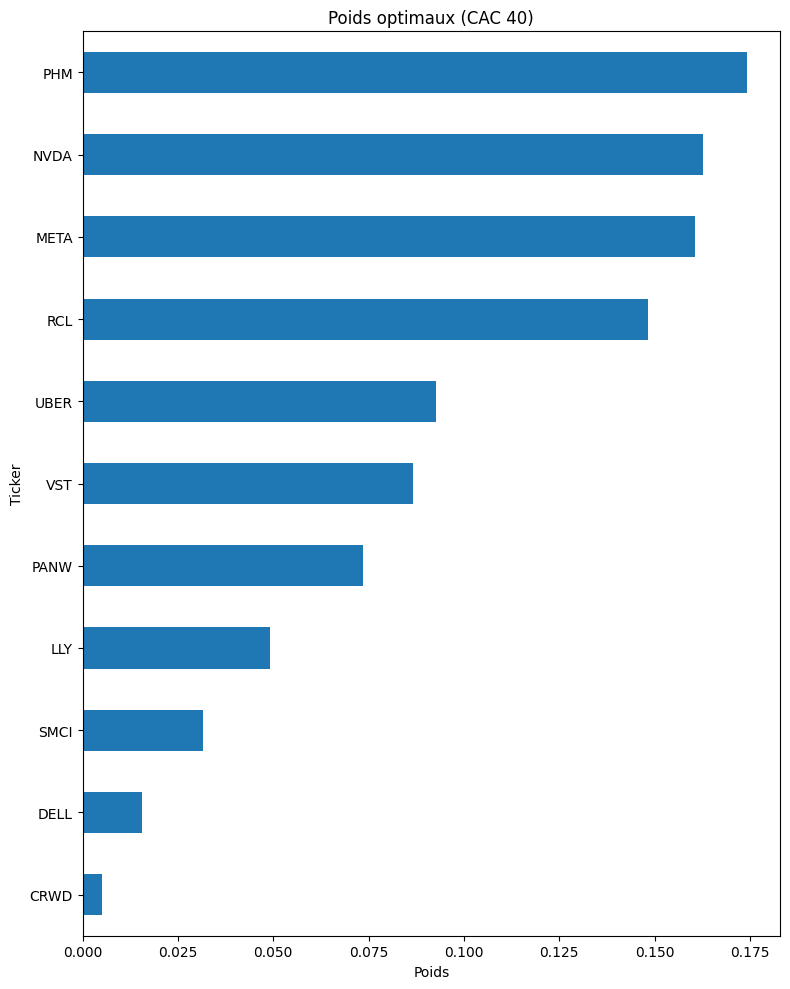

In [88]:
# Optionnel : visualisation
"""plt.bar(tickers, x.value)
plt.title("Poids optimaux du portefeuille")
plt.ylabel("Poids")
plt.show()
"""
# Visualisation
weights.sort_values().plot(kind='barh', title="Poids optimaux (CAC 40)", figsize=(8, 10))
plt.xlabel("Poids")
plt.tight_layout()
plt.show()